In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA

In [3]:
url='https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec'
df = pd.read_csv(url)

In [4]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

PCA

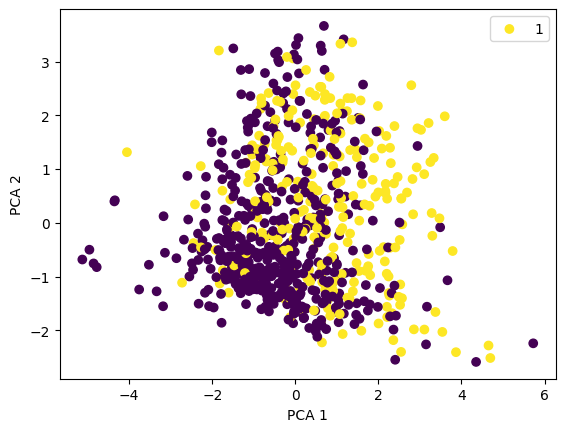

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.legend(y)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X_scaled, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = y)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

Так как классов в столбце outcome всего 2, то понизить до 2 компонент нельзя.

Truncated SVD

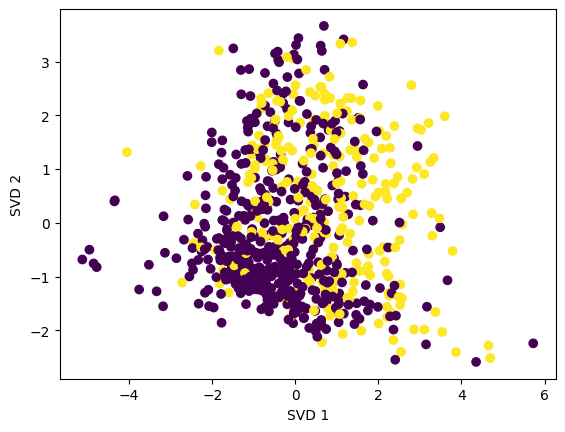

In [ ]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c = y)
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.show()

Kernel PCA


linear


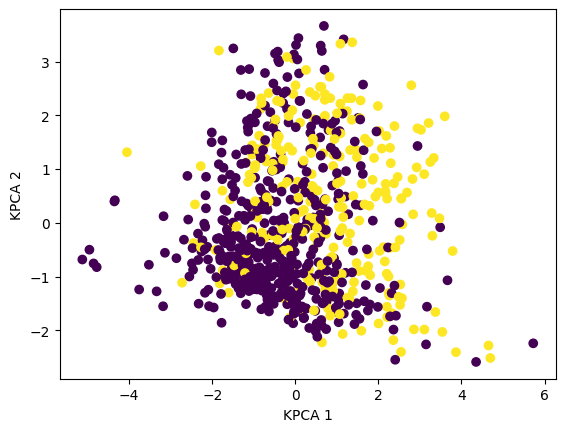

poly


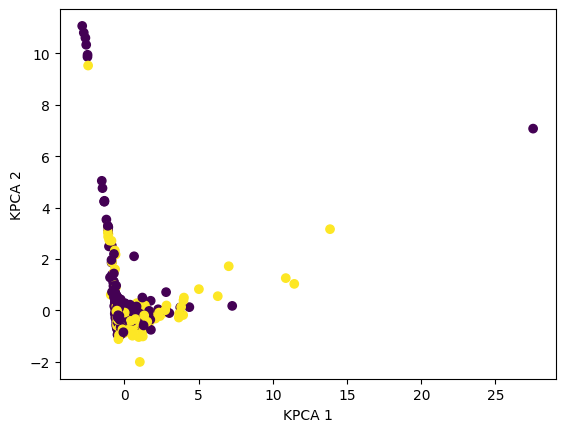

rbf


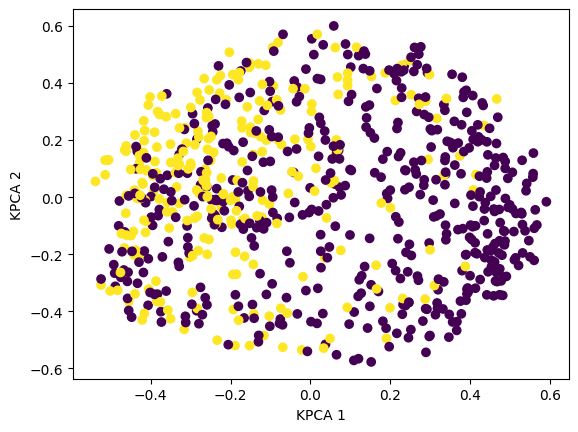

sigmoid


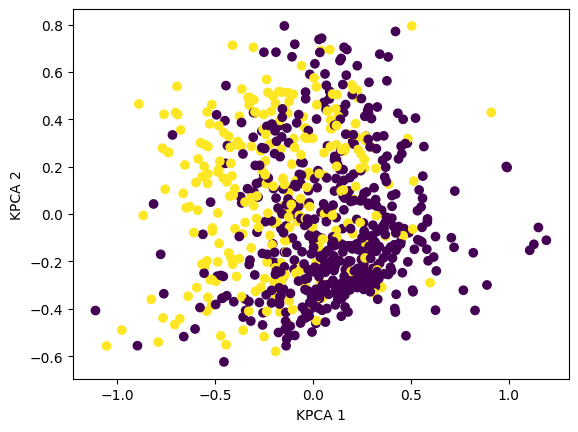

cosine


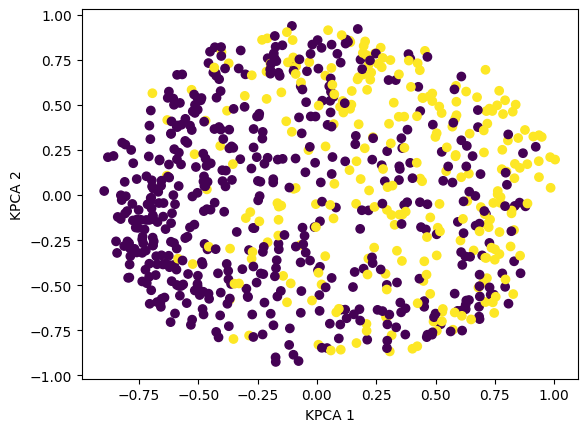

In [ ]:
for kern in ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']:
  kpca = KernelPCA(n_components=2, kernel=kern)
  X_kpca = kpca.fit_transform(X_scaled)
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
  print(kern)
  plt.xlabel('KPCA 1')
  plt.ylabel('KPCA 2')
  plt.show()

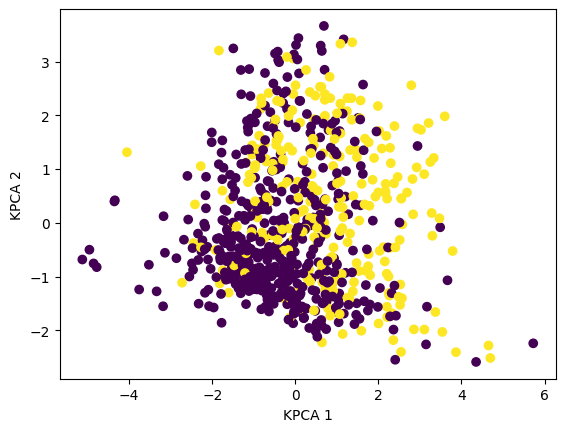

In [ ]:
def linear_kernel(X, Y):
    return X.dot(Y.T)

gram = linear_kernel(X_scaled, X_scaled)
kpca = KernelPCA(n_components=2, kernel='precomputed')
X_kpca = kpca.fit_transform(gram)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.xlabel('KPCA 1')
plt.ylabel('KPCA 2')
plt.show()